In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bpl
import bokeh.models as bmo
from math import pi
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.palettes import Category10

%matplotlib inline

In [3]:
df = pd.read_csv('data/02 Dataset.csv', index_col=False, delimiter=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6594 entries, 0 to 6593
Data columns (total 93 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        6594 non-null   int64  
 1   Trigger_counter           6594 non-null   int64  
 2   TriggerType               6594 non-null   object 
 3   Trigger_time              6594 non-null   object 
 4   Form_finish_time          6594 non-null   object 
 5   Week                      6594 non-null   int64  
 6   Instructor                6594 non-null   int64  
 7   RecDevice                 6594 non-null   int64  
 8   VoltageA                  5808 non-null   float64
 9   VoltageB                  5808 non-null   float64
 10  Clipping                  5808 non-null   float64
 11  AirTemperature            5808 non-null   float64
 12  AirHumidity               5808 non-null   float64
 13  AirPressure               5808 non-null   float64
 14  Luminosi

In [15]:
def get_age(grouped_df, idx):
    return grouped_df["Age"].first().iloc[idx]

def get_gender(grouped_df, idx):
    return grouped_df["Gender"].first().iloc[idx]

grouped_df = df.groupby(df.index)

get_age(grouped_df, 20)
for i in range(90):
    print(get_age(grouped_df, i))

42
22
27
33
61
26
24
52
24
20
60
26
24
60
23
25
47
35
34
27
68
30
58
49
51
19
53
25
29
34
42
58
43
26
19
33
29
37
20
27
47
38
34
57
22
29
27
20
49
24
37
49
35
18
20
37
44
23
22
49
25
24
67
53
23
19
52
50
23
30
66
31
28
25
39
23
24
50
24
43
27
30
49
57
20
27
25
46
68
22


In [ ]:
def get_color_palette(num_colors):
    if num_colors > 10:
        colors = []
        for i in range(num_colors // 10):
            colors.append(Category10[10])
        colors.append(Category10[num_colors % 10])
        colors = [item for sublist in colors for item in sublist]
    else:
        colors = Category10[num_colors] if num_colors > 1 else ['blue']
    return colors
    
    
def radar_chart_bokeh(data):
    if isinstance(data, pd.Series):
        data = pd.DataFrame([data.values], columns=data.index)

    num_rows, num_cols = data.shape
    if num_cols < 2:
        raise ValueError("Data should contain at least two columns.")

    properties = data.columns.tolist()
    num_properties = len(properties)

    if num_properties < 3:
        raise ValueError("There should be at least three properties to plot.")

    angles = np.linspace(0, 2 * np.pi, num_properties, endpoint=False).tolist()

    colors = get_color_palette(num_rows)

    source = ColumnDataSource(data)

    p = figure(width=400, height=400, title="Radar Chart", x_range=(-1.5, 1.5), y_range=(-1.5, 1.5))
    p.aspect_ratio = 1  # Set aspect ratio to ensure the plot fits within the figure

    # Add background lines
    for angle in angles:
        p.line(x=[0, np.cos(angle)], y=[0, np.sin(angle)], line_width=2, color='lightgray')

    labels = []
    legend_labels = []

    for i, angle in enumerate(angles):
        # Calculate the position for the property name label
        label_angle = angle #- np.pi / 2  # Adjust the angle for correct positioning
        label_x = 1.2 * np.cos(label_angle)  # Adjust the label distance from the center
        label_y = 1.2 * np.sin(label_angle)  # Adjust the label distance from the center
        label = p.text(
            x=[label_x],
            y=[label_y],
            text=[properties[i]],
            text_font_size="10pt",
            text_align="center",
            text_baseline="middle",
        )
        labels.append(label)

    for i, participant in enumerate(data.index):
        values = data.loc[participant].values
        x = values * np.cos(angles)
        y = values * np.sin(angles)
        p.patch(x=x, y=y, fill_alpha=0.5, fill_color=colors[i], line_color=colors[i])


    p.xaxis.visible = False
    p.yaxis.visible = False
    p.grid.visible = False  # Hide the underlying grid

    # Create a new figure to hold the background lines
    background_p = figure(
        width=400,
        height=400,
        x_range=(-1.5, 1.5),
        y_range=(-1.5, 1.5),
        toolbar_location=None,
        tools="",
    )
    background_p.grid.visible = False  # Hide the grid in the background plot
    background_p.outline_line_color = None

    return p


# Example usage:
df = pd.DataFrame({
    'Property 1': [0.5, 0.8, 0.6],
    'Property 2': [0.4, 0.6, 0.9],
    'Property 3': [0.7, 0.3, 0.5],
    'Property 4': [0.2, 0.9, 0.7]
}, index=['Participant A', 'Participant B', 'Participant C'])

from bokeh.io import curdoc
from bokeh.layouts import column
from bokeh.models import Slider

# Create the initial radar chart
initial_idx = 0
initial_series = df.iloc[initial_idx]
radar_chart = radar_chart_bokeh(initial_series)

# Create the slider widget
slider = Slider(start=0, end=len(df) - 1, value=initial_idx, step=1, title='Index')

# Define the callback function for slider changes
def update_chart(attr, old, new):
    global idx, radar_chart
    idx = slider.value
    series = df.iloc[idx]
    new_chart = radar_chart_bokeh(series)
    radar_chart = new_chart

# Attach the callback to the slider widget
slider.on_change('value', update_chart)

# Create the layout and add the components
layout = column(slider, radar_chart)

# Add the layout to the current document (curdoc)
curdoc().add_root(layout)

# Show the app in the browser
show(layout)

In [87]:
from sklearn.preprocessing import MinMaxScaler

def make_wellbeing_data(df):
    scaler = MinMaxScaler()
    properties_radar_chart = ["Health", "Wellbeing", "Anxiety", "Hearing_impairment",]
    df[properties_radar_chart] = scaler.fit_transform(df[properties_radar_chart])
    df["Resilience"] = 1 - df["Anxiety"]
    df["Hearing_ability"] = 1 - df["Hearing_impairment"]
    properties_radar_chart = ["Health", "Wellbeing", "Resilience", "Hearing_ability",]
    return df.loc[:, properties_radar_chart].drop_duplicates()


def make_noise_sense_data(df):
    scaler = MinMaxScaler()
    properties_radar_chart = ["Noise_sensitivity_sleep", "Noise_sensitivity_work", "Noise_sensitivity_habit", "Noise_sensitivity"]
    df[properties_radar_chart] = scaler.fit_transform(df[properties_radar_chart])
    return df.loc[:, properties_radar_chart].drop_duplicates()

    
def make_traits_radar(df):
    scaler = MinMaxScaler()
    properties_radar_chart = ["Trait_mood", "Trait_wakefulness", "Trait_rest"]
    df[properties_radar_chart] = scaler.fit_transform(df[properties_radar_chart])
    return df.loc[:, properties_radar_chart].drop_duplicates()


In [ ]:


# rescale the properties_radar_chart to be between 0 and 1

from bokeh.layouts import column, row
from bokeh.models import ColumnDataSource, CustomJS, Slider
from bokeh.plotting import figure, show
from bokeh.transform import cumsum
from math import pi
from bokeh.plotting import curdoc
from bokeh.layouts import column, row
from bokeh.models import Slider, CustomJS
from bokeh.models import Div, RangeSlider

def slider_radar_layout(df):
    # prepare data
    wellbeing_data = make_wellbeing_data(df)
    noise_sense_data = make_noise_sense_data(df)
    trait_data = make_traits_radar(df)
    # initialize the index variable
    idx = 0
    # renderer
    p_wellbeing = radar_chart_bokeh(wellbeing_data.iloc[idx])
    p_noise_sense = radar_chart_bokeh(noise_sense_data.iloc[idx])
    p_traits = radar_chart_bokeh(trait_data.iloc[idx])

    # create a slider to control the index variable idx
    Sliderdiv = Div(
        text="""
            <p>Browse through participants and explore their properties.</p>
            """,
        width=200,
        height=30,
    )
    
    # implement a slider that controls the index variable idx
    # implement a function that updates the plot when the slider is moved
    slider = Slider(
        start=0,
        end=len(wellbeing_data) - 1,
        value=idx,
        step=1,
        title="Participant",
        width=200,
        height=30,
    )
    
    slider.js_event_callbacks['change'] = [CustomJS(
        args=dict(source=p_wellbeing.data_source, slider=slider),
        code="""It seems like there is an issue with the p_wellbeing object. The error message suggests that data_source is not a valid attribute for a figure object.


        var data = source.data;
        var f = slider.value;
        data['x'] = [];
        data['y'] = [];
        for (var i = 0; i < data['x_orig'].length; i++) {
            data['x'].push(data['x_orig'][i] + f);
            data['y'].push(data['y_orig'][i] + f);
        }   
        source.change.emit();
    """,
    )]
    
    # update the plot when the slider is moved
    def update_plot(attr, old, new):
        idx = slider.value
        p_wellbeing = radar_chart_bokeh(wellbeing_data.iloc[idx])
        p_noise_sense = radar_chart_bokeh(noise_sense_data.iloc[idx])
        p_traits = radar_chart_bokeh(trait_data.iloc[idx])
        layout.children[1] = row(p_wellbeing, p_noise_sense, p_traits)
        
    slider.on_change("value", update_plot)

    # create a layout with the slider and the three radar charts
    layout = column(slider, row(p_wellbeing, p_noise_sense, p_traits))

    # create a new document for the layout
    doc = curdoc()
    doc.add_root(layout)
    show(layout)

slider_radar_layout(df)  # Assuming you have a DataFrame named 'df'



In [4]:
# in this way a single participant id can be selected
df["ID"][0]


1132730

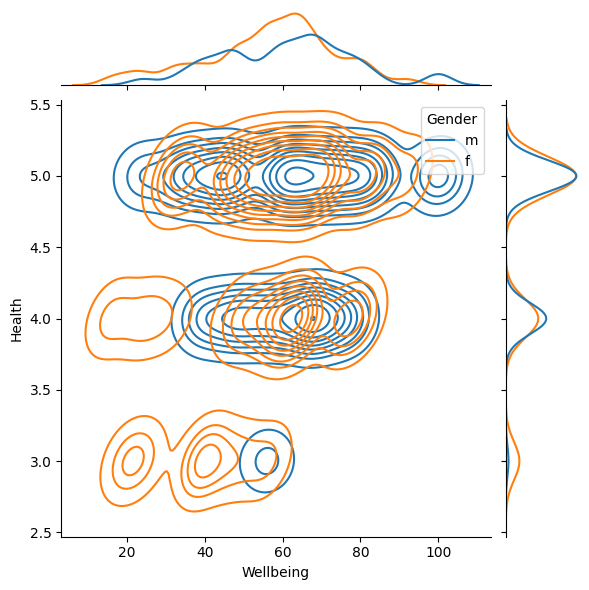

In [10]:
# subset df for a single participant
tmp = df.loc[df["ID"] == df["ID"][0], :]
# make a jointplot for two variables on the axes and a third variable as hue
sns.jointplot(data=df, x="Wellbeing", y="Health", hue="Gender", kind="kde")


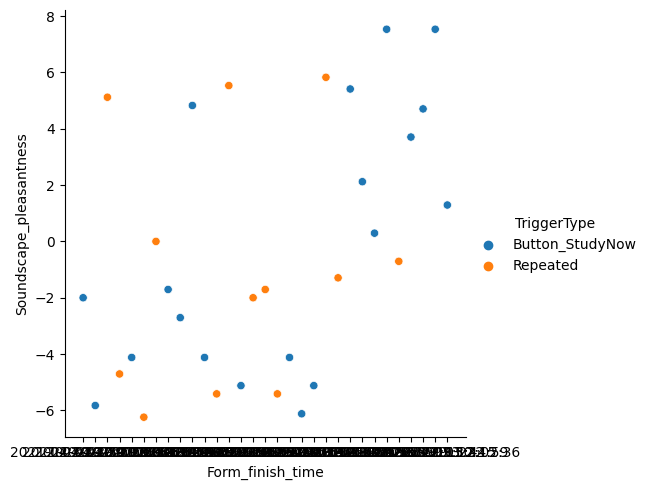

In [23]:
sns.relplot(data=tmp, x="Form_finish_time", y="Soundscape_pleasantness", hue="TriggerType")


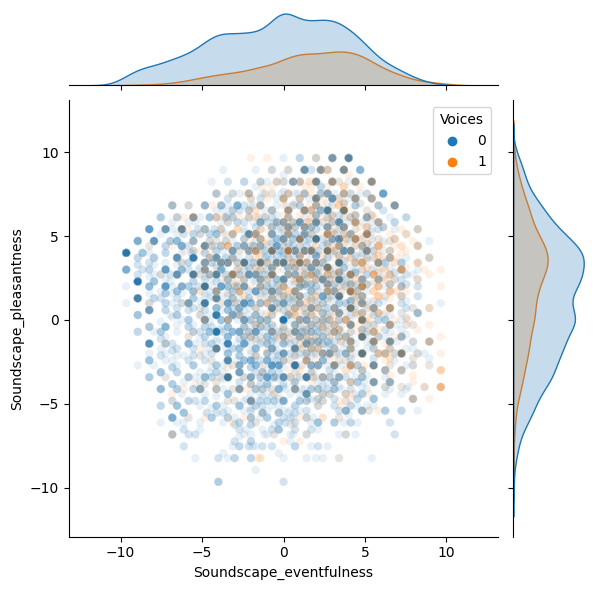

In [26]:
sns.jointplot(data=df, x="Soundscape_eventfulness", y="Soundscape_pleasantness", hue="Voices", alpha=0.1)

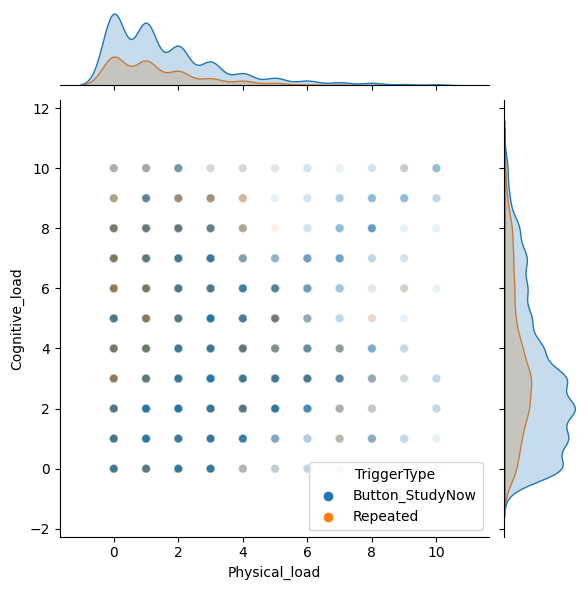

In [31]:
sns.jointplot(data=df, x="Physical_load", y="Cognitive_load", hue="TriggerType", alpha=0.1)

In [4]:
sns.catplot(data=df, kind="swarm", x="TriggerType", y="Physical_load")

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000020C5655A3E0> (for post_execute):


KeyboardInterrupt: 